In [24]:
from IPython.display import HTML
HTML('''<script>
code_show=true; 
function code_toggle() {
 if (code_show){
 $('div.input').hide();
 } else {
 $('div.input').show();
 }
 code_show = !code_show
} 
$( document ).ready(code_toggle);
</script>
To toggle on/off the underlying python code, click <a href="javascript:code_toggle()">here</a>.''')

In [20]:
import json, sys, getopt, os, codecs
import pandas as pd
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns

def usage():
    print("Usage: %s --file=[filename]" % sys.argv[0])
    sys.exit()

def get_target_file(file=None):
    ''' this is the algorithm provided for parser. would use argparse personally...'''
    if not file:
        file=''
        myopts, args = getopt.getopt(sys.argv[1:], "", ["file="])

        for o, a in myopts:
            if o in ('-f, --file'):
                file=a
            else:
                usage()

        if len(file) == 0:
            usage()

    return file

def make_dataframe(file):
    '''build a dataframe from JSON input'''
    # read the target file
    with codecs.open(file, "r", encoding='utf-8', errors='ignore') as fdata:
        urldata = json.load(fdata)
    # build a dataframe
    build_frame = dict(query=[],
                    malicious_url=[],
                    port=[],
                    host_len=[],
                    file_extension=[],
                    path=[],
                    scheme=[],
                    domain_age_days=[],
                    path_tokens=[],
                    domain_tokens=[],
                    tld=[],
                    ips=[],
                    mxhosts=[],
                    registered_domain=[],
                    alexa_rank=[],
                    fragment=[],
                    host=[],
                    url_len=[],
                    num_path_tokens=[],
                    path_len=[],
                    num_domain_tokens=[],
                    default_port=[],
                    url=[])
    
    for record in urldata:
        for k in build_frame.keys():
            build_frame[k].append(record.get(k,"NA"))
    
    return pd.DataFrame(build_frame)

def clean_df(df):
    ''' make sure numeric rows are integers'''
    df['alexa_rank'] = df['alexa_rank'].map(lambda x: int(x) if x else 0)
    df['domain_age_days'] = df['domain_age_days'].map(lambda x: int(x) if x else 0)
    df['host_len'] = df['host_len'].map(lambda x: int(x) if x else 0)
    df['malicious_url'] = df['malicious_url'].map(lambda x: int(x) if x else 0)
    df['path_len'] = df['path_len'].map(lambda x: int(x) if x else 0)
    df['url_len'] = df['url_len'].map(lambda x: int(x) if x else 0)
    return df

def numeric_analytics(df, col):
    ''' look at distribution of numeric column'''
    print('Non malicous {}'.format(col))
    print(df.loc[df['malicious_url'] == 0][col].describe())
    print('\nMalicious {}'.format(col))
    print(df.loc[df['malicious_url'] == 1][col].describe())
    fig, ax = plt.subplots()
    fig.set_size_inches(11.7, 8.27)
    ax = sns.boxplot(x='malicious_url', y=col, data=df)
    plt.show()
    
def unique_value_counts(df, col):
    '''look at 10 most popular unique values plus counts'''
    print("Non Malicious")
    print(df.loc[df['malicious_url'] == 0][col].value_counts()[:10])
    print("Malicious")
    print(df.loc[df['malicious_url'] == 1][col].value_counts()[:10])
    
def top_ips(df):
    ''' get top stats for IP info'''
    geo_dict = dict()
    ip_dict = dict()
    type_dict = dict()

    for i,l in df['ips'].iteritems():
        try:
            for v in l:
                if v.get('geo',None) in geo_dict.keys():
                    geo_dict[v.get('geo')] += 1
                elif v.get('geo',None):
                    geo_dict[v.get('geo')] = 1

                if v.get('ip',None) in ip_dict.keys():
                    ip_dict[v.get('ip')] += 1
                elif v.get('ip',None):
                    ip_dict[v.get('ip')] = 1

                if v.get('type',None) in type_dict.keys():
                    type_dict[v.get('type')] += 1
                elif v.get('type',None):
                    type_dict[v.get('type')] = 1
        except:
            pass

    print("top ten IP geo")      
    for i in [(k, geo_dict[k]) for k in sorted(geo_dict, key=geo_dict.get, reverse=True)][:10]:
        print(i)
    print("top ten IP")      
    for i in [(k, ip_dict[k]) for k in sorted(ip_dict, key=ip_dict.get, reverse=True)][:10]:
        print(i)
    print("top ten IP type")      
    for i in [(k, type_dict[k]) for k in sorted(type_dict, key=type_dict.get, reverse=True)][:10]:
        print(i)

def top_domain_tokens(df):
    ''' get stats for domain token freq'''
    domain_token_dict = dict()
    for i,v in df['domain_tokens'].iteritems():
        for it in v:
            if it in domain_token_dict.keys():
                domain_token_dict[it] += 1
            else:
                domain_token_dict[it] = 1
    print("top ten domain tokens")      
    for i in [(k, domain_token_dict[k]) for k in sorted(domain_token_dict, key=domain_token_dict.get, reverse=True)][:10]:
        print(i)

## read in training data and clean it up


In [2]:
file = get_target_file("train.json")
df = make_dataframe(file)
df = clean_df(df)
df.head()

,alexa_rank,default_port,domain_age_days,domain_tokens,file_extension,fragment,host,host_len,ips,malicious_url,...,path,path_len,path_tokens,port,query,registered_domain,scheme,tld,url,url_len
0,25523,80,5621,"[www, oppo, com]",None,None,www.oppo.com,12,"[{'geo': 'CN', 'ip': '115.236.98.124', 'type':...",0,...,/,1,[],80,utm_source=WeiBo&amp;utm_medium=OPPO&amp;utm_c...,oppo.com,http,com,http://www.oppo.com/?utm_source=WeiBo&amp;utm_...,84
1,0,80,172,"[googledrive, royal-moments, com]",None,None,googledrive.royal-moments.com,29,"[{'geo': 'NL', 'ip': '5.39.220.76', 'type': 'A'}]",1,...,/docs/docs/googledocs/,22,"[docs, docs, googledocs, ]",80,None,royal-moments.com,http,com,http://googledrive.royal-moments.com/docs/docs...,58
2,0,80,9,"[www, coinbase, com, agreement, advicecm, com]",None,None,www.coinbase.com.agreement.advicecm.com,39,"[{'geo': 'NL', 'ip': '46.21.161.247', 'type': ...",1,...,/wallet,7,[wallet],80,None,advicecm.com,http,com,http://www.coinbase.com.agreement.advicecm.com...,53
3,0,80,22,"[eu, battle, net, blizzardentertainmentfreeofa...",htm,None,eu.battle.net.blizzardentertainmentfreeofactiv...,56,"[{'geo': 'HK', 'ip': '122.10.94.86', 'type': '...",1,...,/login/14.htm,13,"[login, 14.htm]",80,None,blizzardentertainmentfreeofactivitiese.com,http,com,http://eu.battle.net.blizzardentertainmentfree...,76
4,8,443,840,"[business, twitter, com]",None,None,business.twitter.com,20,"[{'geo': 'US', 'ip': '199.59.149.243', 'type':...",0,...,/twitter-101,12,[twitter-101],443,None,twitter.com,https,com,https://business.twitter.com/twitter-101,40


## Look at numeric distributions

Non malicous alexa_rank
count     1072.000000
mean      5864.299440
std      14435.315558
min          0.000000
25%         19.000000
50%         51.000000
75%       3129.250000
max      92922.000000
Name: alexa_rank, dtype: float64

Malicious alexa_rank
count       934.000000
mean      44616.309422
std      148827.037910
min           0.000000
25%           0.000000
50%           0.000000
75%           0.000000
max      950889.000000
Name: alexa_rank, dtype: float64


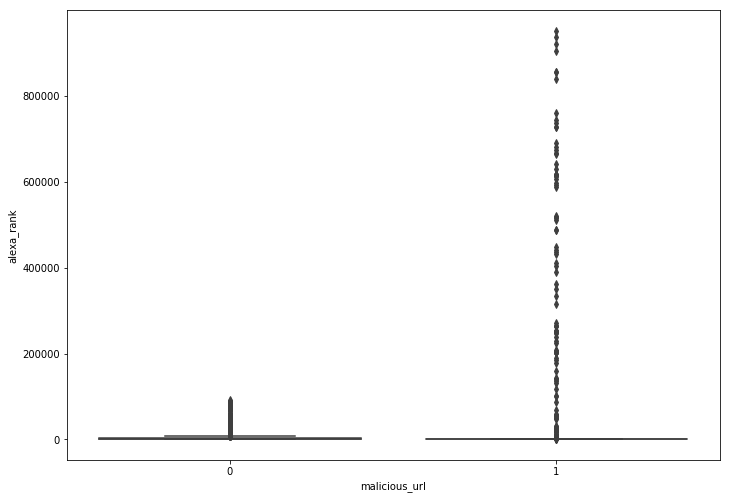

In [3]:
numeric_analytics(df, 'alexa_rank')

Non malicous domain_age_days
count     1072.000000
mean      2728.527052
std       2836.811434
min        449.000000
25%        895.500000
50%       1127.000000
75%       4235.000000
max      16198.000000
Name: domain_age_days, dtype: float64

Malicious domain_age_days
count      934.00000
mean      -151.90257
std       1486.50229
min     -16435.00000
25%         22.25000
50%         47.00000
75%         73.00000
max        365.00000
Name: domain_age_days, dtype: float64


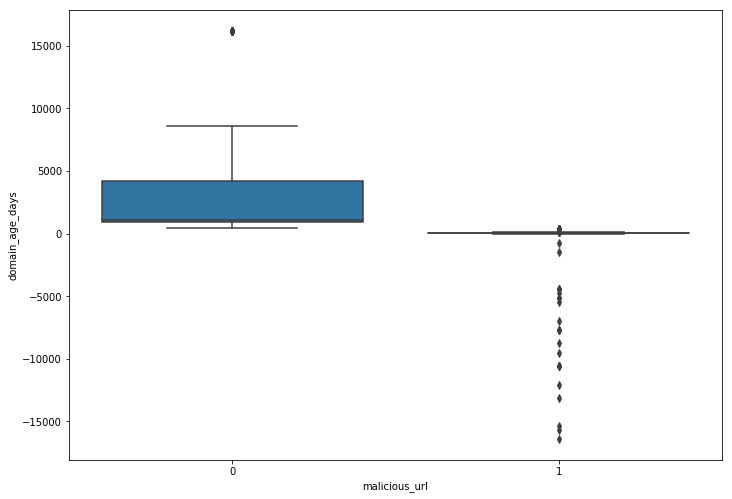

In [4]:
numeric_analytics(df, 'domain_age_days')

Non malicous host_len
count    1072.000000
mean       18.320896
std         6.052957
min         6.000000
25%        14.000000
50%        17.000000
75%        21.000000
max        65.000000
Name: host_len, dtype: float64

Malicious host_len
count    934.000000
mean      23.396146
std       18.204902
min        6.000000
25%       15.000000
50%       19.000000
75%       25.000000
max      185.000000
Name: host_len, dtype: float64


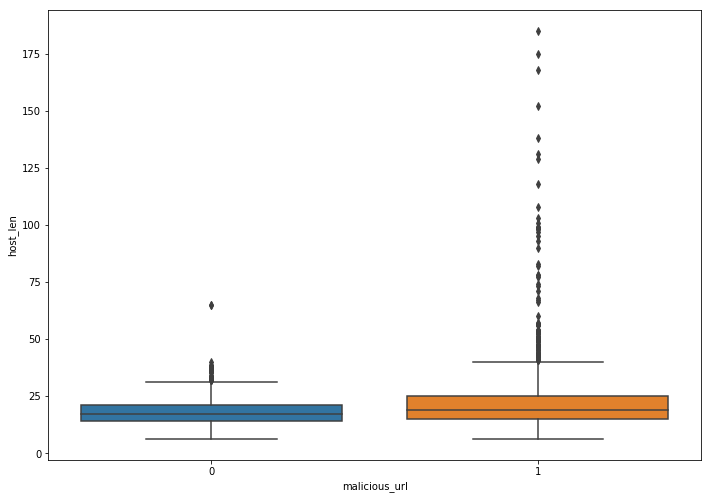

In [5]:
numeric_analytics(df, 'host_len')

Non malicous path_len
count    1072.000000
mean       22.620336
std        25.331499
min         1.000000
25%         3.000000
50%        16.000000
75%        32.000000
max       215.000000
Name: path_len, dtype: float64

Malicious path_len
count    934.000000
mean      27.165953
std       27.351651
min        1.000000
25%        9.000000
50%       20.000000
75%       38.000000
max      292.000000
Name: path_len, dtype: float64


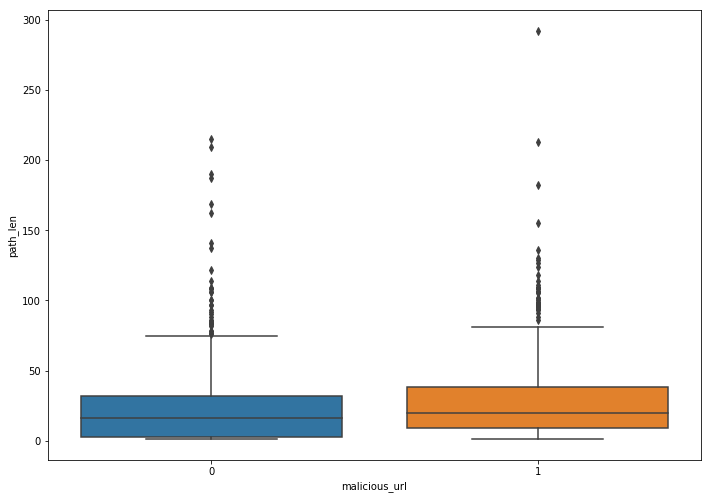

In [6]:
numeric_analytics(df, 'path_len')

Non malicous url_len
count    1072.000000
mean       59.816231
std        45.911708
min        14.000000
25%        32.000000
50%        48.000000
75%        72.000000
max       573.000000
Name: url_len, dtype: float64

Malicious url_len
count     934.00000
mean       69.67666
std        60.60768
min        16.00000
25%        38.00000
50%        54.00000
75%        79.00000
max      1249.00000
Name: url_len, dtype: float64


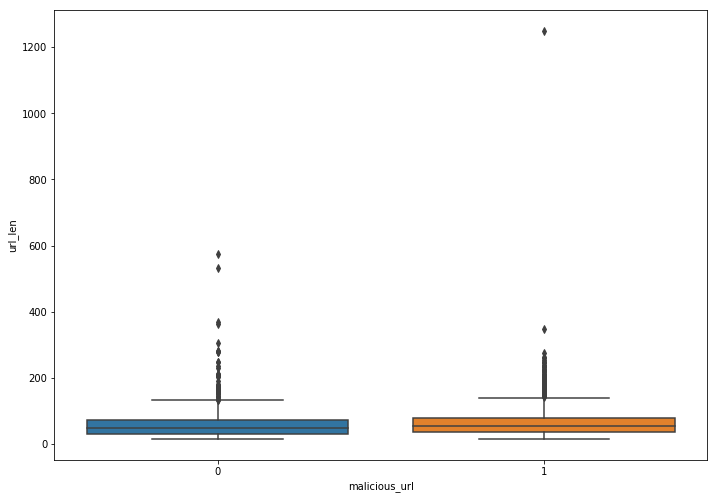

In [7]:
numeric_analytics(df, 'url_len')

In [8]:
unique_value_counts(df, 'default_port')

Non Malicious
80     973
443     99
Name: default_port, dtype: int64
Malicious
80     930
443      3
21       1
Name: default_port, dtype: int64


In [9]:
unique_value_counts(df, 'file_extension')

Non Malicious
js      172
html     60
css      46
php      36
htm      25
mp4      18
aspx     17
jpeg     17
xml      15
flv      11
Name: file_extension, dtype: int64
Malicious
php     170
htm     127
html    125
exe      10
asp       8
cgi       4
js        4
zip       4
swf       3
de        2
Name: file_extension, dtype: int64


In [10]:
unique_value_counts(df, 'scheme')

Non Malicious
http     973
https     99
Name: scheme, dtype: int64
Malicious
http     930
https      3
ftp        1
Name: scheme, dtype: int64


In [11]:
unique_value_counts(df, 'tld')

Non Malicious
com    748
cn     112
jp     101
net     34
org     29
uk       7
hk       7
tw       6
me       3
de       3
Name: tld, dtype: int64
Malicious
com    346
net     45
it      25
br      24
de      24
cl      23
au      22
org     18
lv      17
ar      14
Name: tld, dtype: int64


In [12]:
top_ips(df.loc[df['malicious_url'] == 1])

top ten IP geo
('US', 523)
('DE', 67)
('TR', 40)
('FR', 36)
('IT', 30)
('NL', 25)
('HK', 24)
('GB', 13)
('VG', 12)
('CL', 11)
top ten IP
('67.215.65.133', 258)
('178.210.162.252', 19)
('188.40.70.29', 15)
('188.40.70.27', 15)
('178.33.152.221', 11)
('198.105.254.11', 9)
('122.10.94.86', 8)
('188.40.117.12', 8)
('46.21.161.247', 7)
('81.88.48.95', 6)
top ten IP type
('A', 936)
('AAAA', 21)


In [13]:
top_ips(df.loc[df['malicious_url'] == 0])

top ten IP geo
('US', 1607)
('CN', 799)
('JP', 152)
('TW', 28)
('HK', 25)
('RU', 15)
('AU', 12)
('GB', 11)
('IE', 8)
('NL', 8)
top ten IP
('125.39.191.182', 34)
('182.118.77.70', 34)
('119.188.139.148', 33)
('61.240.135.14', 33)
('182.118.77.67', 33)
('182.118.77.62', 33)
('182.118.77.54', 33)
('119.188.139.100', 32)
('61.240.135.48', 32)
('182.118.12.166', 32)
top ten IP type
('A', 2607)
('AAAA', 104)


In [22]:
top_domain_tokens(df.loc[df['malicious_url'] == 1])

top ten domain tokens
('com', 501)
('www', 293)
('net', 61)
('de', 53)
('co', 49)
('it', 27)
('paypal', 26)
('br', 24)
('cl', 23)
('au', 22)


In [23]:
top_domain_tokens(df.loc[df['malicious_url'] == 0])

top ten domain tokens
('com', 826)
('www', 144)
('cn', 113)
('jp', 103)
('co', 82)
('yahoo', 75)
('sina', 59)
('163', 50)
('sohu', 36)
('house', 36)
